<a href="https://colab.research.google.com/github/hiranyagarbh1/Transperent-ML---Alan-Turing-Institute/blob/main/content/02-linear-reg/multi-linear-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple linear regression

```{admonition} Read then Launch
This content is best viewed in html because jupyter notebook cannot display some content (e.g. figures, equations) properly. You should finish reading this page first and then launch it as an interactive notebook in Google Colab (faster, Google account needed) or Binder by clicking the rocket symbol (<i class="fas fa-rocket"></i>) at the top.
```

We have examined the relationship between `sale` and `TV` of the `Advertising` dataset for simple linear regression. There are two more predictor variables `radio` and `newspaper` in the dataset. How can we account for the effect of these two variables in the model?

Watch the 5-minute video below for a visual explanation of multiple linear regression.

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/EkAQAi3a4js?start=21" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[Explaining Multiple Linear Regression by StatQuest](https://www.youtube.com/embed/EkAQAi3a4js?start=21), embedded according to [YouTube's Terms of Service](https://www.youtube.com/static?gl=CA&template=terms).
```

Then study the following sections to learn more about multiple linear regression with examples in the textbook.

## Install libraries

<!-- The following `matplotlib` upgrade is necessary when using Google Colab (as of 19/11/2022) for this notebook. You may comment it if you are running the code locally on your own computer: -->

If you are using Google Colab, please uncomment the following code to update the version of `matplotlib`. Once complete, click the `RESTART RUNTIME` button to restart the runtime in order to use newly installed versions.

In [ ]:
# !pip install -q mpl_toolkits statsmodels

## Import libraries and load data

Get ready by importing the APIs needed from respective libraries.

In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

%matplotlib inline

**Load Datasets**

Load the [Advertising dataset](https://github.com/pykale/transparentML/blob/main/data/Advertising.csv).

In [3]:
data_url = "https://github.com/pykale/transparentML/raw/main/data/Advertising.csv"
advertising_df = pd.read_csv(data_url, header=0, index_col=0)

To accommodate multiple predictor variables, one option is to run simple linear regression separately for each predictor variable.

The following code runs a simple linear regression model of `radio`, and `newspaper` onto `sales` using `statsmodels`, respectively (Table 3.3 in the textbook).

In [4]:
est = ols("Sales ~ Radio", advertising_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [5]:
est = ols("Sales ~ Newspaper", advertising_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


However, fitting a separate simple linear regression model for each predictor is problematic: 1) It is unclear how to make a single prediction given the three advertising media budgets; 2) each separate linear regression model ignores  the effect of the other two predictors, which can lead to misleading estimates.

A better approach is to use _multiple linear regression_. Multiple linear regression is an extension of simple linear regression. It allows us to predict a quantitative response using more than one predictor variable. The equation for a multiple linear regression model with $D$ predictor variables is given by:

\begin{equation}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_D x_D + \epsilon,
\end{equation}

where $y$ is the response, $x_1, x_2, ..., x_D$ are the $D$ predictors, $D$ is the total number of predictor variables (features), and $\epsilon$ is the error term. The $\beta$s are called the _regression coefficients_, where $\beta_0$ is the bias (intercept), and $\beta_1, \beta_2, ..., \beta_D$ are the weights (slopes). Considering $N$ samples, the equation can be written in matrix form as:

\begin{equation}
\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon},
\end{equation}

where $\mathbf{y}$ is an $N \times 1$ vector of responses, $\mathbf{X}$ is an $N \times (D+1)$ matrix of predictors, $\boldsymbol{\beta}$ is a $(D+1) \times 1$ vector of regression coefficients, and $\boldsymbol{\epsilon}$ is an $N \times 1$ vector of errors. The predictor (feature) matrix $\mathbf{X}$ contains a column of 1s to account for the intercept. The vector $\boldsymbol{\beta}$ contains the intercept in the first position and the slopes for the remaining $D$ predictors. The vector $\boldsymbol{\epsilon}$ contains the error terms for each observation.

Using the `Advertising` dataset as an example, we can fit a multiple linear regression model to the three predictor variables `TV`, `radio`, and `newspaper` to predict `sales` as follows:

\begin{equation}
\text{Sales} = \beta_0 + \beta_1 \times \text{TV} + \beta_2 \times \text{Radio} + \beta_3 \times \text{Newspaper} + \epsilon.
\end{equation}

## Estimating the regression coefficients

Similar to simple linear regression, we can estimate the regression coefficients using least squares. The least squares estimates for the regression coefficients are given by:


\begin{align}
\begin{aligned}
\text{RSS} = & \sum_{i=1}^N (y_i - \hat{y}_i)^2 \\
= & \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \hat{\beta}_2 x_{i2} - ... - \hat{\beta}_D x_{iD})^2,
\end{aligned}
\end{align}

where $y_i$ is the $i$th response, $\hat{y}_i$ is the $i$th predicted response, $\hat{\beta}_0$ is the intercept, $\hat{\beta}_1$ is the slope for $x_{i1}$, $\hat{\beta}_2$ is the slope for $x_{i2}$, and so on. $\hat{\beta}$s are the least squares estimates for the regression coefficients, which can be obtained in matrix form as:

\begin{equation}
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}.
\end{equation}

The following code run a multiple linear regression model to regress `TV`, `radio`, and `newspaper` onto `sales` using `statsmodels`, and display the learnt coefficients (Table 3.4 in the textbook).

In [6]:
est = ols("Sales ~ TV + Radio + Newspaper", advertising_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.58e-96
Time:                        04:13:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting the results

We have interpreted the results of simple linear regression in the [previous section](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#example-explanation-of-system-transparency). The interpretation of the results of multiple linear regression is similar. The only difference is that there are now three coefficients to interpret.

```{admonition} Challenge
:class: important
Interpret the results of the multiple linear regression model above based on the [previous section](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#example-explanation-of-system-transparency) and then click the following to compare the provided interpretation with yours.
```

```{admonition} How to interpret the results?
:class: tip, dropdown
We interpret these results above as follows:
- For a **given** (i.e. fixed) amount of `TV` and `newspaper `advertising budgets, spending an additional \$1,000 on `radio` advertising is associated with approximately 189 units of additional `sales` (_recall the units of the variables_).
- Comparing these coefficients to the estimates in simple linear regression, we notice that the multiple regression coefficient estimates for `TV` and `radio` are pretty similar to the simple linear regression coefficient estimates. However, while the `newspaper` regression coefficient estimate in simple linear regression was significantly non-zero, the coefficient estimate for `newspaper` in the multiple regression model is close to zero, and the corresponding $p$-value is no longer significant, with a value around 0.86.
- This illustrates that the simple and multiple regression coefficients can be quite different. This difference stems from the fact that in the simple regression case, the slope term represents the average increase in product sales associated with a \$1,000 increase in newspaper advertising, ignoring other predictors such as `TV` and `radio`. By contrast, in the multiple regression setting, the coefficient for `newspaper` represents the average increase in product `sales` associated with increasing `newspaper` spending by \$1,000 while holding `TV` and `radio` **fixed**.
```

Why the relationship between `sales` and `newspaper` are opposite in the simple linear regression and multiple linear regression? Use following code displays the correlation matrix of the `Advertising` dataset for further analysis.

In [7]:
advertising_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


```{admonition} How to interpret the results?
:class: tip, dropdown
The [correlation](https://en.wikipedia.org/wiki/Correlation) between `radio` and `newspaper` is 0.35, which is much higher than the other pair-wise correlations among the three medias. This indicates that in those markets spending more on `newspaper` (`radio`) advertising, there is a tendency to spend more on `radio` (`newspaper`) advertising as well.

Now suppose that the multiple regression is correct and `newspaper` advertising is not associated with sales, but `radio` advertising is associated with `sales`. Then in markets where we spend more on `radio`, our sales will tend to be higher. As our correlation matrix shows, we also tend to spend more on `newspaper` advertising in those same markets. Hence, in a simple linear regression which only examines sales versus `newspaper`, we will observe that higher values of `newspaper` tend to be associated with higher values of `sales`, even though `newspaper` advertising is not directly associated with `sales`. So `newspaper` advertising is a surrogate for `radio` advertising; `newspaper` gets “credit” for the association between `radio` on `sales`.
```

## Important questions in multiple linear regression

### Is at least one of the predictors $x_1, x_2, ..., x_D$ useful in predicting the response?

We can answer this question by testing the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) that all the regression coefficients are zero, i.e.

$$
H_0: \beta_1 = \beta_2 = ... = \beta_D = 0.
$$

versus the [alternative hypothesis](https://en.wikipedia.org/wiki/Alternative_hypothesis) that at least one of the regression coefficients is non-zero, i.e.:

$$
H_1: \text{at least one of the regression coefficients is non-zero}.
$$

This hypothesis test is performed by computing the [$F$-statistic](https://en.wikipedia.org/wiki/F-test), which is defined as:

\begin{equation}
F = \frac{(\text{TSS} - \text{RSS})/D}{\text{RSS}/(N-D-1)},
\end{equation}

where $\text{TSS} = \sum(y_i - \bar{y})^2$ and $\text{RSS} = \sum(y_i - \hat{y}_i)^2$. Remember, $y_i$ is the $i$th target, $\hat{y}_i$ is the $i$th prediction and $\bar{y}$ is the sample mean. When there is no relationship between the response and predictors, one would expect the $F$-statistic to take on a value close to 1. On the other hand, if $H_1$ a is true, we can expect $F$ to be greater than 1.

The $F$-statistic for the multiple linear regression model obtained by regressing `sales` onto `radio`, `TV`, and `newspaper` is 570.3 (displayed in the first regression results in [a previous section](https://pykale.github.io/transparentML/02-linear-reg/multi-linear-regression.html#estimating-the-regression-coefficients)). Since this is far greater than 1, it provides compelling evidence against the null hypothesis $H_0$. In other words, the large $F$-statistic suggests that at least one of the advertising media must be related to `sales`.

Watch the following 9-minute video excerpt to learn more about the $F$-statistic.

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/7ArmBVF2dCs?start=969&end=1525" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

[Calculating a $p$-value for $R^2$ by StatQuest](https://www.youtube.com/embed/7ArmBVF2dCs?start=969&end=1525), embedded according to [YouTube's Terms of Service](https://www.youtube.com/static?gl=CA&template=terms).
```

<!-- then $E\{\text{TSS} - \text{RSS}/p\} > \sigma^2$, where $\sigma$ is the standard deviation of the error term, so we expect $F$ to be greater than 1. -->

<!-- The numerator of the F-statistic is the ratio of the total sum of squares to the residual sum of squares, and the denominator is the ratio of the residual sum of squares to the degrees of freedom. The F-statistic has an $F$ distribution with $p$ and $n-p-1$ degrees of freedom. The null hypothesis is that all the regression coefficients are zero, and the alternative hypothesis is that at least one of the regression coefficients is non-zero.  -->


### Do all the predictors help to explain $y$, or is only a subset of the predictors useful?

It is possible that the response is only associated with a subset of the predictors. The task of determining which subset of predictors are (most) associated with the response is referred to as *variable selection* (or *feature selection*). This will be discussed in more detail in {doc}`Feature Selection and Regularisation <../06-ftr-select-regularise/overview>`.

<!-- in order to fit a single model involving only those predictors,  -->

There are three common approaches to variable selection:

- Forward selection. We begin with a model containing no predictors, and then consider adding predictors one at a time until all predictors have been considered. The best single predictor is added to the model, and the process is repeated until all predictors have been added to the model. This is a greedy algorithm, and it is not guaranteed to find the best model containing a subset of the predictors.
- Backward selection. We begin with a model containing all predictors, and then consider removing predictors one at a time until no predictors remain. The worst single predictor is removed from the model, and the process is repeated until no predictors remain in the model. This is also a greedy algorithm, and it is not guaranteed to find the best model containing a subset of the predictors.
- Mixed selection. We begin with some initial model containing a subset of the predictors. We then consider adding or removing each predictor individually, and retain the best model that results. This is also a greedy algorithm, and it is not guaranteed to find the best model containing a subset of the predictors.

### How well does the model fit the data?

Similar to simple linear regression. We can answer this question by computing the $R^2$ and RSE statistics. The $R^2$ for multiple linear regression is defined in the same way as in simple linear regression as:

\begin{equation}
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} = 1 - \frac{\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}.
\end{equation}

The $R^2$ statistic provides an indication of the proportion of the variance in the response that is predictable from the predictors. In this case, the $R^2$ statistic is 0.897, which indicates that 89.7% of the variance in `sales` is predictable from `TV`, `radio`, and `newspaper`.

The RSE for multiple linear regression is defined as:

\begin{equation}
\text{RSE} = \sqrt{\frac{\text{RSS}}{N-D-1}} = \sqrt{\frac{\sum(y_i - \hat{y}_i)^2}{N-D-1}}.
\end{equation}

You can verify that when $D=1$, the RSE for multiple linear regression is the same as the RSE for {doc}`simple linear regression <simple-linear-regression>`.

Run the following code to fit and then evaluate a multiple linear regression model using `scikit-learn`:

Firstly, fit a linear regression to `sales` using `TV` and `radio` as predictors.

In [8]:
regr = LinearRegression()

X = advertising_df[["Radio", "TV"]].values
y = advertising_df.Sales

regr.fit(X, y)
print(regr.coef_)
print(regr.intercept_)

[0.18799423 0.04575482]
2.9210999124051398


Find out the min/max values of Radio & TV to set up the grid (range) for plotting.

In [9]:
advertising_df[["Radio", "TV"]].describe()

,Radio,TV
count,200.000000,200.000000
mean,23.264000,147.042500
std,14.846809,85.854236
min,0.000000,0.700000
25%,9.975000,74.375000
50%,22.900000,149.750000
75%,36.525000,218.825000
max,49.600000,296.400000


Create a coordinate grid

In [10]:
radio = np.arange(0, 50)
tv = np.arange(0, 300)

beta_1, beta_2 = np.meshgrid(radio, tv, indexing="xy")
Z = np.zeros((tv.size, radio.size))

for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = (
        regr.intercept_ + beta_1[i, j] * regr.coef_[0] + beta_2[i, j] * regr.coef_[1]
    )

Create 3D plot of `sales` vs `TV` and `radio`.

<!-- [ToDo] If possible, change the following to stem plot, such as in the [stem3d_demo](https://matplotlib.org/stable/gallery/mplot3d/stem3d_demo.html) to better visualisation as the textbook. -->

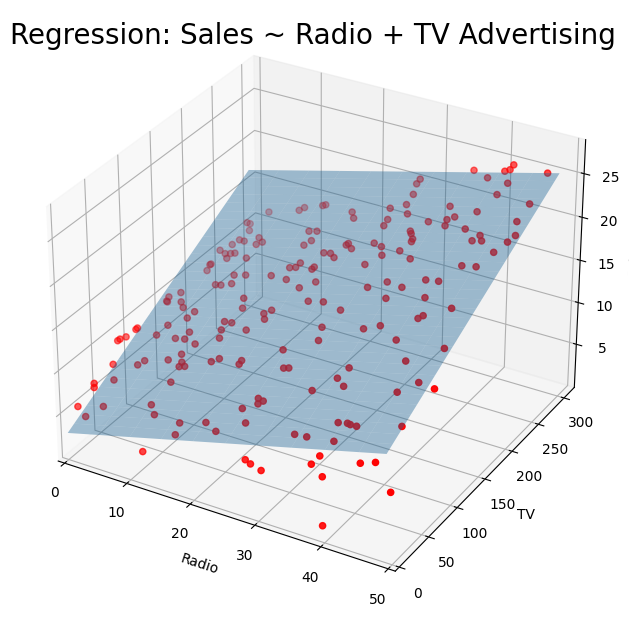

In [11]:
# Create plot
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Regression: Sales ~ Radio + TV Advertising", fontsize=20)

ax = axes3d.Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot_surface(beta_1, beta_2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising_df.Radio, advertising_df.TV, advertising_df.Sales, c="r")

ax.set_xlabel("Radio")
ax.set_xlim(0, 50)
ax.set_ylabel("TV")
ax.set_ylim(bottom=0)
ax.set_zlabel("Sales")
plt.show()

### Given a set of predictor values, what response value should we predict, and how accurate is our prediction?

<!-- **[Advanced, add more content of prediction interval/or remove this sub-section later]** -->

Once we have fit a multiple linear regression model, we can use the model to make predictions of the response for a given set of predictor values.

\begin{equation}
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_D x_D.
\end{equation}

However, we must be careful when making predictions, because the observed values of the predictors may not have been part of the data used to fit the model. In this case, the prediction may not be very accurate and using a confidence interval can help quantify the uncertainty associated with the prediction.



## Exercise

**1**. All the following exercises involve the use of the **[Carseats](https://github.com/pykale/transparentML/blob/main/data/Carseats.csv)** dataset. Fit a multiple regression model to predict **Sales** using **Price**, **Income**, and **CompPrice**. **Hint**: See section [2.2.5](https://pykale.github.io/transparentML/02-linear-reg/multi-linear-regression.html#important-questions-in-multiple-linear-regression).

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load data
carseats_df = pd.read_csv(
    "https://github.com/pykale/transparentML/raw/main/data/Carseats.csv"
)

regr = LinearRegression()

X = carseats_df[["Price", "Income", "CompPrice"]].values
y = carseats_df.Sales

regr.fit(X, y)
print("Regression model slop/coeffcient (weight):", regr.coef_)
print("Regression model intercept (bias):", regr.intercept_)

Regression model slop/coeffcient (weight): [-0.08719674  0.01525145  0.09278583]
Regression model intercept (bias): 4.950235603666373


**i**. How well does the model fit the data?

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regr.predict(X)
print("R2 score:", r2_score(y, y_pred))

# The model didn't fit the data well as the R2 score is still way below 1.

R2 score: 0.3805237817874102


**ii**. Does multiple linear regression help the model fit the data better than simpler linear regression (see simple linear regression [exercises](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#exercise)).

*Compare your answer with the solution below*

```{toggle}
**Yes. The** $R^2$ **score has increased in multiple linear regression, and the MSE has decreased, which means the model performed better than simpler linear regression in terms of fitting the data.**

```

**iii**. Write out the model in equation form.

*Compare your answer with the solution below*

```{toggle}
$\hat{y} = 4.95 + (-0.08719674 * Price) + (0.01525145 * Income) + (0.09278583 * CompPrice)$

```

**2**. Find the correlation between **Sales, Price, Income, and CompPrice** and interpret the result. **Hint**: See section [2.2.4](https://pykale.github.io/transparentML/02-linear-reg/multi-linear-regression.html#interpreting-the-results).

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [14]:
carseats_df[["Sales", "Price", "Income", "CompPrice"]].corr()

# The correlation between Price and CompPrice is 0.58, which is much higher than the other pair-wise correlations. This indicates that by increasing the component price(Price) of a caraseat, there is a tendency for the overall price(CompPrice) to increase as well.

,Sales,Price,Income,CompPrice
Sales,1.000000,-0.444951,0.151951,0.064079
Price,-0.444951,1.000000,-0.056698,0.584848
Income,0.151951,-0.056698,1.000000,-0.080653
CompPrice,0.064079,0.584848,-0.080653,1.000000


**3**. Perform a multiple linear regression using **statsmodels** library with **Sales** as the response and **Price**, **Income**, and **CompPrice** as predictors. Use the **summary()** function to print the results. Compare the regression coefficients/weights with **Exercise 1**. **Hint**: See section [2.2.3](https://pykale.github.io/transparentML/02-linear-reg/multi-linear-regression.html#estimating-the-regression-coefficients).

In [ ]:
# Write your code below to answer the question


*Compare your answer with the reference solution below*

In [15]:
import patsy
import statsmodels.api as sm

f = "Sales ~ Price + Income + CompPrice"
y, X = patsy.dmatrices(f, carseats_df, return_type="dataframe")

model = sm.OLS(y, X).fit()
print(model.summary())

# The regression coeffcients are same as scikit learn model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     81.08
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           6.52e-41
Time:                        04:30:14   Log-Likelihood:                -886.58
No. Observations:                 400   AIC:                             1781.
Df Residuals:                     396   BIC:                             1797.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9502      0.981      5.044      0.0

**4**. From the model fitted in **Exercise 3**, for which predictors can you reject the null hypothesis $H_0 : \beta_j = 0$ ? **Hint**: See section [2.2.5](https://pykale.github.io/transparentML/02-linear-reg/multi-linear-regression.html#important-questions-in-multiple-linear-regression).

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [16]:
# The following predictors have p-values < 0.05 which suggests we can reject the null hypothesis
model.pvalues[model.pvalues < 0.05].sort_values()

Price        1.475505e-40
CompPrice    2.972755e-22
Intercept    6.951811e-07
Income       1.619686e-04
dtype: float64

**i**. Which predictors appear to have a **statistically significant** relationship with the response?


*Compare your answer with the solution below*

```{toggle}
**All predictors appear to have a statistically significant relationship to the response.**
```

**ii**. What does the coefficient for the income variable suggest?


*Compare your answer with the solution below*

```{toggle}
**The coefficient for the income variable suggests that there is a positive relationship between income and sales, where the response variable increases as income increases.**
```

**5**. Using the fitted model from **Exercise 3**, obtain **$95\%$** confidence intervals for the coefficients. **Hint**: See section [2.1.9](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#confidence-intervals).

In [ ]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [17]:
# Extract 95% confidence intervals
conf_inter_95 = model.conf_int(alpha=0.05)
conf_inter_95.rename(
    index=str,
    columns={
        0: "min.",
        1: "max.",
    },
)

,min.,max.
Intercept,3.020863,6.879608
Price,-0.098632,-0.075762
Income,0.007379,0.023124
CompPrice,0.075101,0.110471
